In [1]:
from fastdtw import fastdtw
from keras.layers import LSTM
from keras.models import Sequential, load_model

from timeseries_ml_utils.data import *
from timeseries_ml_utils.statistics import *
from timeseries_ml_utils.encoders import *

import matplotlib.pyplot as plt


# fetch data
data = DataFetcher(["GLD.US"], limit=500)
data.fetch_data().tail()

print(len(data.get_dataframe()))
model_data = DataGenerator(data.get_dataframe(), {"^trigonometric": identity, "(Open|High|Low|Close)$": normalize}, {"GLD.US.Close$": normalize},
                           aggregation_window_size=16, batch_size=10, model_filename="/tmp/keras-foo-1.h5")

print(model_data.batch_feature_shape)
print(model_data.batch_label_shape)
model_data.features, model_data.labels

model = Sequential(name="LSTM-Model-1")
model.add(LSTM(model_data.batch_label_shape[-1],
               name="LSTM-Layer-1",
               batch_input_shape=model_data.batch_feature_shape,
               activation='tanh',
               dropout=0,
               recurrent_dropout=0,
               stateful=True,
               return_sequences=model_data.return_sequences))

model.compile("Adam", loss="mse", metrics=['mae', 'acc'])

train_args = {"epochs": 1,
              "use_multiprocessing": True,
              "workers": 4,
              "shuffle": False}

model_data.fit(model, train_args, frequency=10, relative_accuracy_function=relative_dtw_2, log_dir="/tmp/foo.123/")


predict = model_data.as_predictive_data_generator()

Using TensorFlow backend.


500


(10, 260, 224)
(10, 16)


Epoch 1/1


  1/160 [..............................] - ETA: 7:15 - loss: 0.1296 - mean_absolute_error: 0.2912 - acc: 0.1000

  2/160 [..............................] - ETA: 3:49 - loss: 0.1167 - mean_absolute_error: 0.2727 - acc: 0.1000

  3/160 [..............................] - ETA: 2:41 - loss: 0.1045 - mean_absolute_error: 0.2546 - acc: 0.0667

  4/160 [..............................] - ETA: 2:06 - loss: 0.0934 - mean_absolute_error: 0.2381 - acc: 0.0500

  5/160 [..............................] - ETA: 1:45 - loss: 0.0837 - mean_absolute_error: 0.2223 - acc: 0.0400

  6/160 [>.............................] - ETA: 1:31 - loss: 0.0753 - mean_absolute_error: 0.2071 - acc: 0.0333

  7/160 [>.............................] - ETA: 1:21 - loss: 0.0681 - mean_absolute_error: 0.1931 - acc: 0.0429

  8/160 [>.............................] - ETA: 1:14 - loss: 0.0620 - mean_absolute_error: 0.1809 - acc: 0.0500

  9/160 [>.............................] - ETA: 1:17 - loss: 0.0569 - mean_absolute_error: 0.1701 - acc: 0.0556

 10/160 [>.............................] - ETA: 1:11 - loss: 0.0526 - mean_absolute_error: 0.1608 - acc: 0.0600

 11/160 [=>............................] - ETA: 1:06 - loss: 0.0489 - mean_absolute_error: 0.1525 - acc: 0.0636

/home/kic/sources/github/python/timeseries_ml_utils/timeseries_ml_utils/statistics.py:29: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  prediction_distance = fastdtw(x, y, dist=2)[0]



 [0.71371572 0.72076913 0.72782254 0.73487595 0.74192936 0.74898277
 0.75603618 0.76308959 0.770143   0.77719641 0.78424982] 

 12/160 [=>............................] - ETA: 1:39 - loss: 0.0456 - mean_absolute_error: 0.1451 - acc: 0.0667

 13/160 [=>............................] - ETA: 1:31 - loss: 0.0428 - mean_absolute_error: 0.1385 - acc: 0.0692

 14/160 [=>............................] - ETA: 1:26 - loss: 0.0403 - mean_absolute_error: 0.1326 - acc: 0.0714

 15/160 [=>............................] - ETA: 1:21 - loss: 0.0380 - mean_absolute_error: 0.1274 - acc: 0.0733

 16/160 [==>...........................] - ETA: 1:17 - loss: 0.0359 - mean_absolute_error: 0.1225 - acc: 0.0750

 17/160 [==>...........................] - ETA: 1:13 - loss: 0.0340 - mean_absolute_error: 0.1181 - acc: 0.0706

 18/160 [==>...........................] - ETA: 1:10 - loss: 0.0323 - mean_absolute_error: 0.1139 - acc: 0.0667

 19/160 [==>...........................] - ETA: 1:07 - loss: 0.0307 - mean_absolute_error: 0.1100 - acc: 0.0632

 20/160 [==>...........................] - ETA: 1:04 - loss: 0.0294 - mean_absolute_error: 0.1065 - acc: 0.0600

 21/160 [==>...........................] - ETA: 1:02 - loss: 0.0281 - mean_absolute_error: 0.1032 - acc: 0.0571


 [0.7204087  0.7287499  0.73709109 0.74543229 0.75377349 0.76211468
 0.77045588 0.77879708 0.78713827 0.79547947 0.80382067] 

 22/160 [===>..........................] - ETA: 1:15 - loss: 0.0269 - mean_absolute_error: 0.1002 - acc: 0.0545

 23/160 [===>..........................] - ETA: 1:12 - loss: 0.0259 - mean_absolute_error: 0.0973 - acc: 0.0522

 24/160 [===>..........................] - ETA: 1:09 - loss: 0.0249 - mean_absolute_error: 0.0946 - acc: 0.0500

 25/160 [===>..........................] - ETA: 1:07 - loss: 0.0239 - mean_absolute_error: 0.0921 - acc: 0.0480

 26/160 [===>..........................] - ETA: 1:05 - loss: 0.0231 - mean_absolute_error: 0.0896 - acc: 0.0462

 27/160 [====>.........................] - ETA: 1:03 - loss: 0.0223 - mean_absolute_error: 0.0873 - acc: 0.0444

 28/160 [====>.........................] - ETA: 1:01 - loss: 0.0215 - mean_absolute_error: 0.0851 - acc: 0.0429

 29/160 [====>.........................] - ETA: 59s - loss: 0.0208 - mean_absolute_error: 0.0829 - acc: 0.0414 

 30/160 [====>.........................] - ETA: 57s - loss: 0.0202 - mean_absolute_error: 0.0807 - acc: 0.0400

 31/160 [====>.........................] - ETA: 55s - loss: 0.0195 - mean_absolute_error: 0.0787 - acc: 0.0387


 [0.70985256 0.72017868 0.73050479 0.74083091 0.75115702 0.76148314
 0.77180925 0.78213537 0.79246148 0.8027876  0.81311371] 

 32/160 [=====>........................] - ETA: 1:04 - loss: 0.0189 - mean_absolute_error: 0.0768 - acc: 0.0375

 33/160 [=====>........................] - ETA: 1:02 - loss: 0.0184 - mean_absolute_error: 0.0749 - acc: 0.0364

 34/160 [=====>........................] - ETA: 1:00 - loss: 0.0178 - mean_absolute_error: 0.0732 - acc: 0.0353

 35/160 [=====>........................] - ETA: 59s - loss: 0.0173 - mean_absolute_error: 0.0715 - acc: 0.0343 

 36/160 [=====>........................] - ETA: 57s - loss: 0.0169 - mean_absolute_error: 0.0698 - acc: 0.0333

 37/160 [=====>........................] - ETA: 56s - loss: 0.0164 - mean_absolute_error: 0.0683 - acc: 0.0324

 38/160 [======>.......................] - ETA: 54s - loss: 0.0160 - mean_absolute_error: 0.0668 - acc: 0.0316

 39/160 [======>.......................] - ETA: 53s - loss: 0.0156 - mean_absolute_error: 0.0655 - acc: 0.0308

 40/160 [======>.......................] - ETA: 52s - loss: 0.0152 - mean_absolute_error: 0.0642 - acc: 0.0300

 41/160 [======>.......................] - ETA: 50s - loss: 0.0149 - mean_absolute_error: 0.0630 - acc: 0.0293


 [0.70094366 0.71209174 0.72323982 0.7343879  0.74553598 0.75668406
 0.76783214 0.77898022 0.7901283  0.80127638 0.81242446] 

 42/160 [======>.......................] - ETA: 56s - loss: 0.0145 - mean_absolute_error: 0.0618 - acc: 0.0286

 43/160 [=======>......................] - ETA: 55s - loss: 0.0142 - mean_absolute_error: 0.0607 - acc: 0.0279

 44/160 [=======>......................] - ETA: 54s - loss: 0.0139 - mean_absolute_error: 0.0596 - acc: 0.0273

 45/160 [=======>......................] - ETA: 52s - loss: 0.0136 - mean_absolute_error: 0.0586 - acc: 0.0267

 46/160 [=======>......................] - ETA: 51s - loss: 0.0133 - mean_absolute_error: 0.0576 - acc: 0.0283

 47/160 [=======>......................] - ETA: 50s - loss: 0.0130 - mean_absolute_error: 0.0567 - acc: 0.0298

 48/160 [========>.....................] - ETA: 49s - loss: 0.0127 - mean_absolute_error: 0.0558 - acc: 0.0333

 49/160 [========>.....................] - ETA: 48s - loss: 0.0125 - mean_absolute_error: 0.0549 - acc: 0.0367

 50/160 [========>.....................] - ETA: 47s - loss: 0.0122 - mean_absolute_error: 0.0540 - acc: 0.0400

 51/160 [========>.....................] - ETA: 46s - loss: 0.0120 - mean_absolute_error: 0.0532 - acc: 0.0431


 [0.69607561 0.70763709 0.71919858 0.73076007 0.74232155 0.75388304
 0.76544453 0.77700601 0.7885675  0.80012898 0.81169047] 

 52/160 [========>.....................] - ETA: 50s - loss: 0.0118 - mean_absolute_error: 0.0523 - acc: 0.0462

 53/160 [========>.....................] - ETA: 49s - loss: 0.0115 - mean_absolute_error: 0.0515 - acc: 0.0491

 54/160 [=========>....................] - ETA: 48s - loss: 0.0113 - mean_absolute_error: 0.0508 - acc: 0.0519

 55/160 [=========>....................] - ETA: 47s - loss: 0.0111 - mean_absolute_error: 0.0500 - acc: 0.0527

 56/160 [=========>....................] - ETA: 46s - loss: 0.0109 - mean_absolute_error: 0.0493 - acc: 0.0536

 57/160 [=========>....................] - ETA: 45s - loss: 0.0108 - mean_absolute_error: 0.0486 - acc: 0.0544

 58/160 [=========>....................] - ETA: 44s - loss: 0.0106 - mean_absolute_error: 0.0480 - acc: 0.0534

 59/160 [==========>...................] - ETA: 43s - loss: 0.0104 - mean_absolute_error: 0.0474 - acc: 0.0525

 60/160 [==========>...................] - ETA: 42s - loss: 0.0102 - mean_absolute_error: 0.0468 - acc: 0.0517

 61/160 [==========>...................] - ETA: 41s - loss: 0.0101 - mean_absolute_error: 0.0463 - acc: 0.0508


 [0.69392858 0.70556186 0.71719515 0.72882843 0.74046172 0.752095
 0.76372828 0.77536157 0.78699485 0.79862814 0.81026142] 

 62/160 [==========>...................] - ETA: 45s - loss: 0.0099 - mean_absolute_error: 0.0458 - acc: 0.0500

 63/160 [==========>...................] - ETA: 44s - loss: 0.0098 - mean_absolute_error: 0.0453 - acc: 0.0492

 64/160 [===========>..................] - ETA: 43s - loss: 0.0096 - mean_absolute_error: 0.0448 - acc: 0.0484

 65/160 [===========>..................] - ETA: 42s - loss: 0.0095 - mean_absolute_error: 0.0444 - acc: 0.0477

 66/160 [===========>..................] - ETA: 41s - loss: 0.0093 - mean_absolute_error: 0.0439 - acc: 0.0470

 67/160 [===========>..................] - ETA: 40s - loss: 0.0092 - mean_absolute_error: 0.0435 - acc: 0.0463

 68/160 [===========>..................] - ETA: 39s - loss: 0.0091 - mean_absolute_error: 0.0431 - acc: 0.0456

 69/160 [===========>..................] - ETA: 39s - loss: 0.0089 - mean_absolute_error: 0.0427 - acc: 0.0449

 70/160 [============>.................] - ETA: 38s - loss: 0.0088 - mean_absolute_error: 0.0423 - acc: 0.0443

 71/160 [============>.................] - ETA: 37s - loss: 0.0087 - mean_absolute_error: 0.0419 - acc: 0.0437


 [0.684512   0.6962536  0.7079952  0.7197368  0.7314784  0.74322
 0.7549616  0.76670321 0.77844481 0.79018641 0.80192801] 

 72/160 [============>.................] - ETA: 39s - loss: 0.0086 - mean_absolute_error: 0.0415 - acc: 0.0431

 73/160 [============>.................] - ETA: 38s - loss: 0.0085 - mean_absolute_error: 0.0411 - acc: 0.0425

 74/160 [============>.................] - ETA: 38s - loss: 0.0084 - mean_absolute_error: 0.0407 - acc: 0.0419

 75/160 [=============>................] - ETA: 37s - loss: 0.0083 - mean_absolute_error: 0.0404 - acc: 0.0413

 76/160 [=============>................] - ETA: 36s - loss: 0.0081 - mean_absolute_error: 0.0400 - acc: 0.0408

 77/160 [=============>................] - ETA: 35s - loss: 0.0080 - mean_absolute_error: 0.0397 - acc: 0.0403

 78/160 [=============>................] - ETA: 35s - loss: 0.0079 - mean_absolute_error: 0.0394 - acc: 0.0397

 79/160 [=============>................] - ETA: 34s - loss: 0.0079 - mean_absolute_error: 0.0391 - acc: 0.0392

 80/160 [==============>...............] - ETA: 33s - loss: 0.0078 - mean_absolute_error: 0.0388 - acc: 0.0388

 81/160 [==============>...............] - ETA: 32s - loss: 0.0077 - mean_absolute_error: 0.0385 - acc: 0.0383


 [0.68300864 0.69415161 0.70529458 0.71643756 0.72758053 0.7387235
 0.74986648 0.76100945 0.77215242 0.7832954  0.79443837] 

 82/160 [==============>...............] - ETA: 34s - loss: 0.0076 - mean_absolute_error: 0.0382 - acc: 0.0378

 83/160 [==============>...............] - ETA: 34s - loss: 0.0075 - mean_absolute_error: 0.0380 - acc: 0.0373

 84/160 [==============>...............] - ETA: 33s - loss: 0.0074 - mean_absolute_error: 0.0377 - acc: 0.0369

 85/160 [==============>...............] - ETA: 32s - loss: 0.0073 - mean_absolute_error: 0.0374 - acc: 0.0365

 86/160 [===============>..............] - ETA: 32s - loss: 0.0072 - mean_absolute_error: 0.0372 - acc: 0.0360

 87/160 [===============>..............] - ETA: 31s - loss: 0.0072 - mean_absolute_error: 0.0369 - acc: 0.0356

 88/160 [===============>..............] - ETA: 30s - loss: 0.0071 - mean_absolute_error: 0.0366 - acc: 0.0352

 89/160 [===============>..............] - ETA: 30s - loss: 0.0070 - mean_absolute_error: 0.0364 - acc: 0.0348

 90/160 [===============>..............] - ETA: 29s - loss: 0.0069 - mean_absolute_error: 0.0361 - acc: 0.0356

 91/160 [================>.............] - ETA: 28s - loss: 0.0069 - mean_absolute_error: 0.0359 - acc: 0.0363


 [0.69590222 0.70567041 0.7154386  0.72520679 0.73497498 0.74474317
 0.75451136 0.76427955 0.77404774 0.78381593 0.79358412] 

 92/160 [================>.............] - ETA: 30s - loss: 0.0068 - mean_absolute_error: 0.0356 - acc: 0.0370

 93/160 [================>.............] - ETA: 29s - loss: 0.0067 - mean_absolute_error: 0.0354 - acc: 0.0376

 94/160 [================>.............] - ETA: 28s - loss: 0.0067 - mean_absolute_error: 0.0351 - acc: 0.0394

 95/160 [================>.............] - ETA: 28s - loss: 0.0066 - mean_absolute_error: 0.0349 - acc: 0.0421

 96/160 [=================>............] - ETA: 27s - loss: 0.0065 - mean_absolute_error: 0.0347 - acc: 0.0448

 97/160 [=================>............] - ETA: 26s - loss: 0.0065 - mean_absolute_error: 0.0345 - acc: 0.0454

 98/160 [=================>............] - ETA: 26s - loss: 0.0064 - mean_absolute_error: 0.0343 - acc: 0.0459

 99/160 [=================>............] - ETA: 25s - loss: 0.0063 - mean_absolute_error: 0.0341 - acc: 0.0465

100/160 [=================>............] - ETA: 25s - loss: 0.0063 - mean_absolute_error: 0.0340 - acc: 0.0470

101/160 [=================>............] - ETA: 24s - loss: 0.0062 - mean_absolute_error: 0.0338 - acc: 0.0465


 [0.70191527 0.7108704  0.71982552 0.72878065 0.73773578 0.74669091
 0.75564603 0.76460116 0.77355629 0.78251142 0.79146654] 

102/160 [==================>...........] - ETA: 25s - loss: 0.0062 - mean_absolute_error: 0.0337 - acc: 0.0461

103/160 [==================>...........] - ETA: 24s - loss: 0.0061 - mean_absolute_error: 0.0336 - acc: 0.0456

104/160 [==================>...........] - ETA: 24s - loss: 0.0061 - mean_absolute_error: 0.0335 - acc: 0.0452

105/160 [==================>...........] - ETA: 23s - loss: 0.0060 - mean_absolute_error: 0.0334 - acc: 0.0448

106/160 [==================>...........] - ETA: 22s - loss: 0.0060 - mean_absolute_error: 0.0333 - acc: 0.0443

107/160 [===================>..........] - ETA: 22s - loss: 0.0059 - mean_absolute_error: 0.0332 - acc: 0.0439

108/160 [===================>..........] - ETA: 21s - loss: 0.0059 - mean_absolute_error: 0.0331 - acc: 0.0435

109/160 [===================>..........] - ETA: 21s - loss: 0.0058 - mean_absolute_error: 0.0330 - acc: 0.0431

110/160 [===================>..........] - ETA: 20s - loss: 0.0058 - mean_absolute_error: 0.0329 - acc: 0.0427

111/160 [===================>..........] - ETA: 20s - loss: 0.0057 - mean_absolute_error: 0.0328 - acc: 0.0423


 [0.69447565 0.70318829 0.71190093 0.72061357 0.7293262  0.73803884
 0.74675148 0.75546412 0.76417676 0.7728894  0.78160204] 

112/160 [====================>.........] - ETA: 20s - loss: 0.0057 - mean_absolute_error: 0.0327 - acc: 0.0420

113/160 [====================>.........] - ETA: 20s - loss: 0.0057 - mean_absolute_error: 0.0326 - acc: 0.0416

114/160 [====================>.........] - ETA: 19s - loss: 0.0056 - mean_absolute_error: 0.0325 - acc: 0.0412

115/160 [====================>.........] - ETA: 19s - loss: 0.0056 - mean_absolute_error: 0.0323 - acc: 0.0409

116/160 [====================>.........] - ETA: 18s - loss: 0.0055 - mean_absolute_error: 0.0323 - acc: 0.0405

117/160 [====================>.........] - ETA: 18s - loss: 0.0055 - mean_absolute_error: 0.0322 - acc: 0.0402

118/160 [=====================>........] - ETA: 17s - loss: 0.0055 - mean_absolute_error: 0.0321 - acc: 0.0407

119/160 [=====================>........] - ETA: 17s - loss: 0.0054 - mean_absolute_error: 0.0320 - acc: 0.0412

120/160 [=====================>........] - ETA: 16s - loss: 0.0054 - mean_absolute_error: 0.0319 - acc: 0.0408

121/160 [=====================>........] - ETA: 16s - loss: 0.0053 - mean_absolute_error: 0.0318 - acc: 0.0405


 [0.65749063 0.66818511 0.67887958 0.68957406 0.70026854 0.71096302
 0.7216575  0.73235198 0.74304645 0.75374093 0.76443541] 

122/160 [=====================>........] - ETA: 16s - loss: 0.0053 - mean_absolute_error: 0.0317 - acc: 0.0402

123/160 [======================>.......] - ETA: 15s - loss: 0.0053 - mean_absolute_error: 0.0316 - acc: 0.0398

124/160 [======================>.......] - ETA: 15s - loss: 0.0052 - mean_absolute_error: 0.0316 - acc: 0.0395

125/160 [======================>.......] - ETA: 14s - loss: 0.0052 - mean_absolute_error: 0.0315 - acc: 0.0400

126/160 [======================>.......] - ETA: 14s - loss: 0.0052 - mean_absolute_error: 0.0315 - acc: 0.0405

127/160 [======================>.......] - ETA: 13s - loss: 0.0051 - mean_absolute_error: 0.0315 - acc: 0.0409

128/160 [=======================>......] - ETA: 13s - loss: 0.0051 - mean_absolute_error: 0.0314 - acc: 0.0414

129/160 [=======================>......] - ETA: 12s - loss: 0.0051 - mean_absolute_error: 0.0313 - acc: 0.0419

130/160 [=======================>......] - ETA: 12s - loss: 0.0050 - mean_absolute_error: 0.0313 - acc: 0.0423

131/160 [=======================>......] - ETA: 11s - loss: 0.0050 - mean_absolute_error: 0.0312 - acc: 0.0420


 [0.66726391 0.67693754 0.68661117 0.6962848  0.70595844 0.71563207
 0.7253057  0.73497933 0.74465297 0.7543266  0.76400023] 

132/160 [=======================>......] - ETA: 12s - loss: 0.0050 - mean_absolute_error: 0.0311 - acc: 0.0417

133/160 [=======================>......] - ETA: 11s - loss: 0.0050 - mean_absolute_error: 0.0311 - acc: 0.0414

134/160 [========================>.....] - ETA: 11s - loss: 0.0049 - mean_absolute_error: 0.0310 - acc: 0.0410

135/160 [========================>.....] - ETA: 10s - loss: 0.0049 - mean_absolute_error: 0.0310 - acc: 0.0407

136/160 [========================>.....] - ETA: 10s - loss: 0.0049 - mean_absolute_error: 0.0309 - acc: 0.0404

137/160 [========================>.....] - ETA: 9s - loss: 0.0048 - mean_absolute_error: 0.0309 - acc: 0.0401 

138/160 [========================>.....] - ETA: 9s - loss: 0.0048 - mean_absolute_error: 0.0308 - acc: 0.0399

139/160 [=========================>....] - ETA: 8s - loss: 0.0048 - mean_absolute_error: 0.0307 - acc: 0.0396

140/160 [=========================>....] - ETA: 8s - loss: 0.0048 - mean_absolute_error: 0.0307 - acc: 0.0393

141/160 [=========================>....] - ETA: 7s - loss: 0.0047 - mean_absolute_error: 0.0306 - acc: 0.0397


 [0.62679422 0.64213551 0.6574768  0.67281808 0.68815937 0.70350065
 0.71884194 0.73418323 0.74952451 0.7648658  0.78020709] 

142/160 [=========================>....] - ETA: 7s - loss: 0.0047 - mean_absolute_error: 0.0305 - acc: 0.0394

143/160 [=========================>....] - ETA: 7s - loss: 0.0047 - mean_absolute_error: 0.0305 - acc: 0.0392

144/160 [==========================>...] - ETA: 6s - loss: 0.0047 - mean_absolute_error: 0.0304 - acc: 0.0396

145/160 [==========================>...] - ETA: 6s - loss: 0.0046 - mean_absolute_error: 0.0304 - acc: 0.0400

146/160 [==========================>...] - ETA: 5s - loss: 0.0046 - mean_absolute_error: 0.0303 - acc: 0.0404

147/160 [==========================>...] - ETA: 5s - loss: 0.0046 - mean_absolute_error: 0.0302 - acc: 0.0408

148/160 [==========================>...] - ETA: 5s - loss: 0.0045 - mean_absolute_error: 0.0302 - acc: 0.0412

149/160 [==========================>...] - ETA: 4s - loss: 0.0045 - mean_absolute_error: 0.0301 - acc: 0.0409

150/160 [===========================>..] - ETA: 4s - loss: 0.0045 - mean_absolute_error: 0.0300 - acc: 0.0407

151/160 [===========================>..] - ETA: 3s - loss: 0.0045 - mean_absolute_error: 0.0300 - acc: 0.0404


 [0.54440532 0.56735799 0.59031066 0.61326332 0.63621599 0.65916866
 0.68212132 0.70507399 0.72802666 0.75097932 0.77393199] 

152/160 [===========================>..] - ETA: 3s - loss: 0.0044 - mean_absolute_error: 0.0299 - acc: 0.0401

153/160 [===========================>..] - ETA: 2s - loss: 0.0044 - mean_absolute_error: 0.0298 - acc: 0.0399

154/160 [===========================>..] - ETA: 2s - loss: 0.0044 - mean_absolute_error: 0.0297 - acc: 0.0396

155/160 [============================>.] - ETA: 2s - loss: 0.0044 - mean_absolute_error: 0.0296 - acc: 0.0400

156/160 [============================>.] - ETA: 1s - loss: 0.0043 - mean_absolute_error: 0.0296 - acc: 0.0404

157/160 [============================>.] - ETA: 1s - loss: 0.0043 - mean_absolute_error: 0.0295 - acc: 0.0401

158/160 [============================>.] - ETA: 0s - loss: 0.0043 - mean_absolute_error: 0.0294 - acc: 0.0399

159/160 [============================>.] - ETA: 0s - loss: 0.0043 - mean_absolute_error: 0.0293 - acc: 0.0396

160/160 [==============================] - 74s 462ms/step - loss: 0.0042 - mean_absolute_error: 0.0292 - acc: 0.0394 - val_loss: 0.0019 - val_mean_absolute_error: 0.0324 - val_acc: 0.0732



 [0.59528492 0.61795166 0.64061839 0.66328513 0.68595186 0.7086186
 0.73128534 0.75395207 0.77661881 0.79928554 0.82195228] 



bad 5, avg 25, top 45, last 50


0.5953    | ###############
0.618     | #########################
0.6406    | ##########
0.6633    | #########################
0.686     | ##############################
0.7086    | #########################
0.7313    | ##############################
0.754     | ##################################################
0.7766    | ###############
0.7993    | #########################


In [2]:
prediction, labels, r_squares, stds = predict.back_test(model.predict)



AttributeError: 'numpy.ndarray' object has no attribute 'hist'

(1, 190, 16)

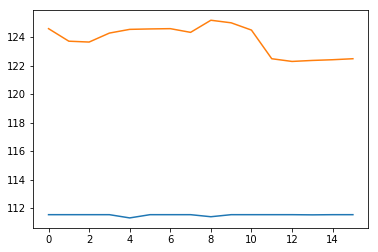

In [12]:

plt.plot(prediction[0][60])
plt.plot(labels[0][60])
prediction.shape